In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
data_path = 'data/sj5.csv'
# Read csv data file using Pandas
lxxn = pd.read_csv(data_path)

In [37]:
lxxn.head()

,FT,FET,FDT,CT,RT,FDH,Si,Mn,P,S,...,B,NbC,NbN,Nbs,Als,Cs,Ns,AlN,EL,Seq
0,1127,1015,843,592,1023,4.749,0.0143,0.7597,0.0152,0.0041,...,0.0000,0.031642,0.039468,0.000535,0.030900,0.066418,0.000403,0.001556,33.5,1
1,1137,1030,847,595,1032,3.750,0.0126,0.7106,0.0123,0.0075,...,0.0000,0.016025,0.017140,0.000555,0.035011,0.070905,0.000355,0.008806,41.0,2
2,1137,1039,851,589,1040,2.998,0.0324,0.8651,0.0202,0.0045,...,0.0005,0.016338,0.017787,0.000635,0.037941,0.064009,0.000328,0.035487,44.0,3
3,1142,1028,860,599,1028,3.998,0.0196,0.7348,0.0121,0.0026,...,0.0000,0.028951,0.037127,0.000544,0.030905,0.064169,0.000402,0.000930,38.0,4
4,1146,1038,858,601,1048,4.747,0.0283,0.7273,0.0156,0.0020,...,0.0000,0.037326,0.034416,0.000614,0.041728,0.071500,0.000298,0.005743,34.5,5


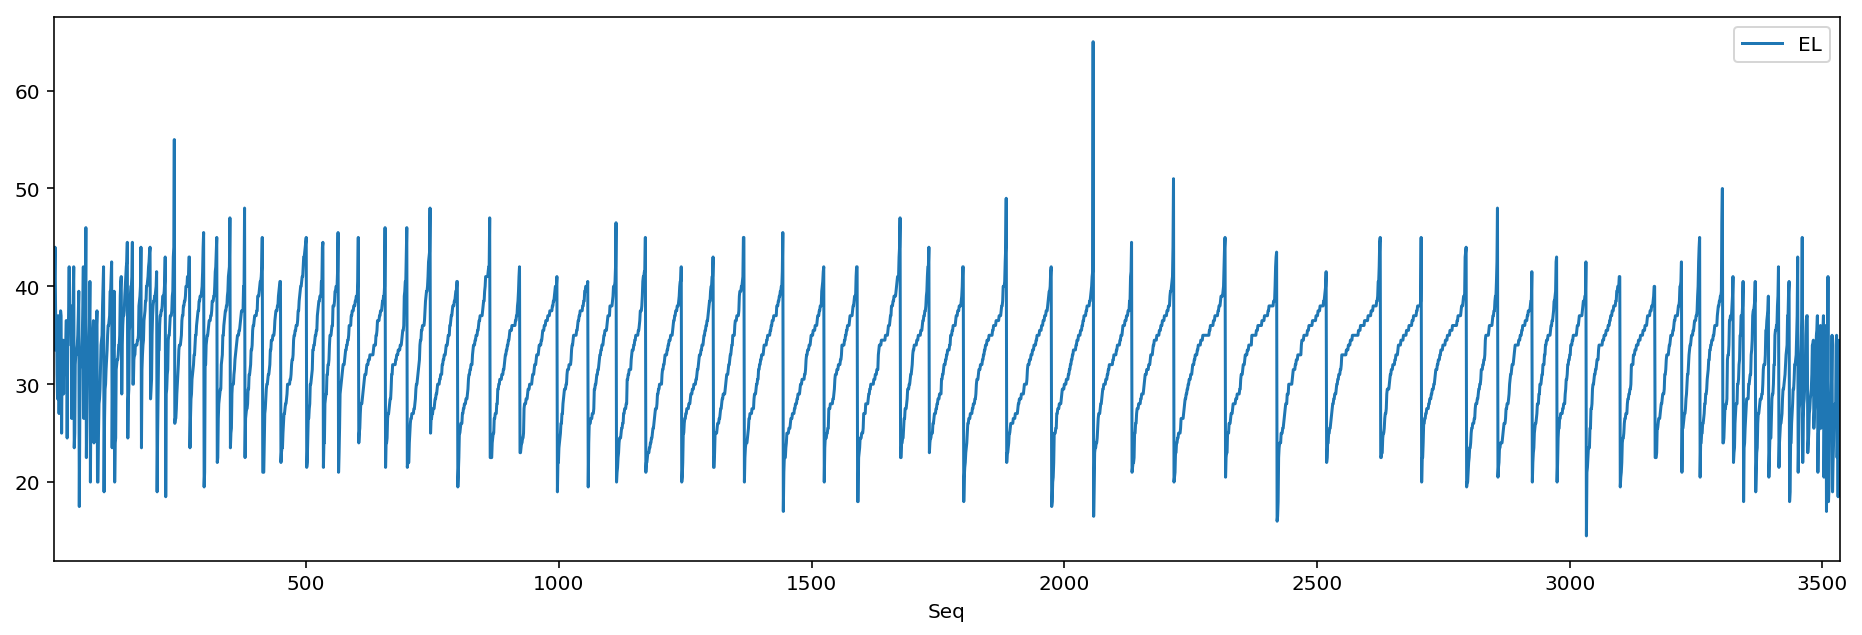

In [38]:
lxxn[::1].plot(x='Seq', y='EL', figsize=[16,5])

In [39]:
dummy_fields = []
for each in dummy_fields:
    dummies = pd.get_dummies(lxxn[each], prefix=each, drop_first=False)
    lxxn = pd.concat([lxxn, dummies], axis=1)

fields_to_drop = []
data = lxxn.drop(fields_to_drop, axis=1)
data.head()

,FT,FET,FDT,CT,RT,FDH,Si,Mn,P,S,...,B,NbC,NbN,Nbs,Als,Cs,Ns,AlN,EL,Seq
0,1127,1015,843,592,1023,4.749,0.0143,0.7597,0.0152,0.0041,...,0.0000,0.031642,0.039468,0.000535,0.030900,0.066418,0.000403,0.001556,33.5,1
1,1137,1030,847,595,1032,3.750,0.0126,0.7106,0.0123,0.0075,...,0.0000,0.016025,0.017140,0.000555,0.035011,0.070905,0.000355,0.008806,41.0,2
2,1137,1039,851,589,1040,2.998,0.0324,0.8651,0.0202,0.0045,...,0.0005,0.016338,0.017787,0.000635,0.037941,0.064009,0.000328,0.035487,44.0,3
3,1142,1028,860,599,1028,3.998,0.0196,0.7348,0.0121,0.0026,...,0.0000,0.028951,0.037127,0.000544,0.030905,0.064169,0.000402,0.000930,38.0,4
4,1146,1038,858,601,1048,4.747,0.0283,0.7273,0.0156,0.0020,...,0.0000,0.037326,0.034416,0.000614,0.041728,0.071500,0.000298,0.005743,34.5,5


In [40]:

quant_features = ['EL','FT', 'FET', 'FDT', 'CT', 'RT', 'FDH','Si','Mn','P','S','Cu','Ni','Cr','Mo','Seq','V','Ti','NbC','NbN','Nbs','Als','Cs','Ns','AlN']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std


In [41]:
# Save the last 500 data
test_data = data[-500:]
data = data[:-500]

# Separate the data into features and targets
target_fields = ['EL']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [42]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-300], targets[:-300]
val_features, val_targets = features[-300:], targets[-300:]

In [43]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        
        self.learning_rate = learning_rate
    
        # Activation function - Sigmoid function
        self.activation_function = sigmoid_function
    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # Forward pass #
        
        # Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = final_inputs
    
        # Backward pass #
        
        # Output errors
        output_errors = targets - final_outputs

        # Backpropagated error
        hidden_errors = output_errors * self.weights_hidden_to_output * 1.0
        hidden_grad = np.dot(hidden_errors.T * hidden_outputs * (1 - hidden_outputs), inputs.T)
        
        # Update the weights
        grad_out = np.dot(hidden_outputs, output_errors * 1.0)
        self.weights_hidden_to_output += self.learning_rate * grad_out.T / inputs.shape[1] 
        self.weights_input_to_hidden += self.learning_rate * hidden_grad / inputs.shape[1]
        
    def run(self, inputs_list):
        # Forward pass #
        
        # Input layer
        inputs = np.array(inputs_list, ndmin=2).T
        
        # Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Output layer
        final_inputs =  np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = final_inputs 
        
        return final_outputs

In [44]:
def mean_square_error(y, Y):
    return np.mean((y-Y)**2)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

In [45]:
import sys

# Hyperparameters #
epochs = 100
learning_rate = 0.01
hidden_nodes = 10
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=32)
    for record, target in zip(train_features.iloc[batch].values, 
                              train_targets.iloc[batch]['EL']):
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = mean_square_error(network.run(train_features), train_targets['EL'].values)
    val_loss = mean_square_error(network.run(val_features), val_targets['EL'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.0% ... Training loss: 0.465 ... Validation loss: 0.327

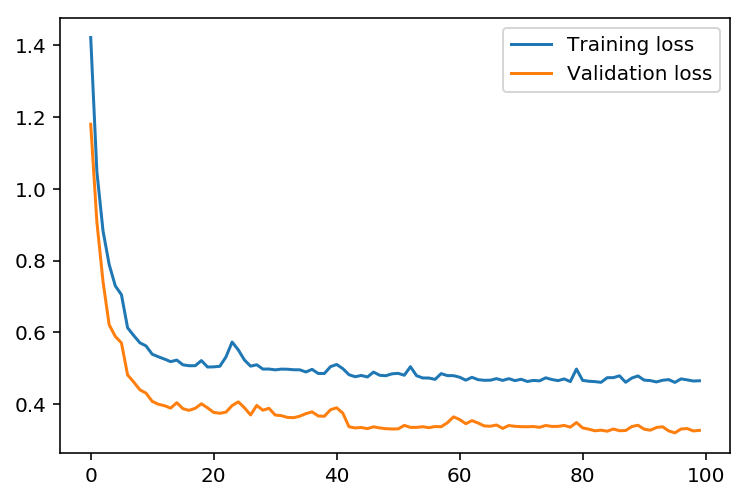

In [46]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()

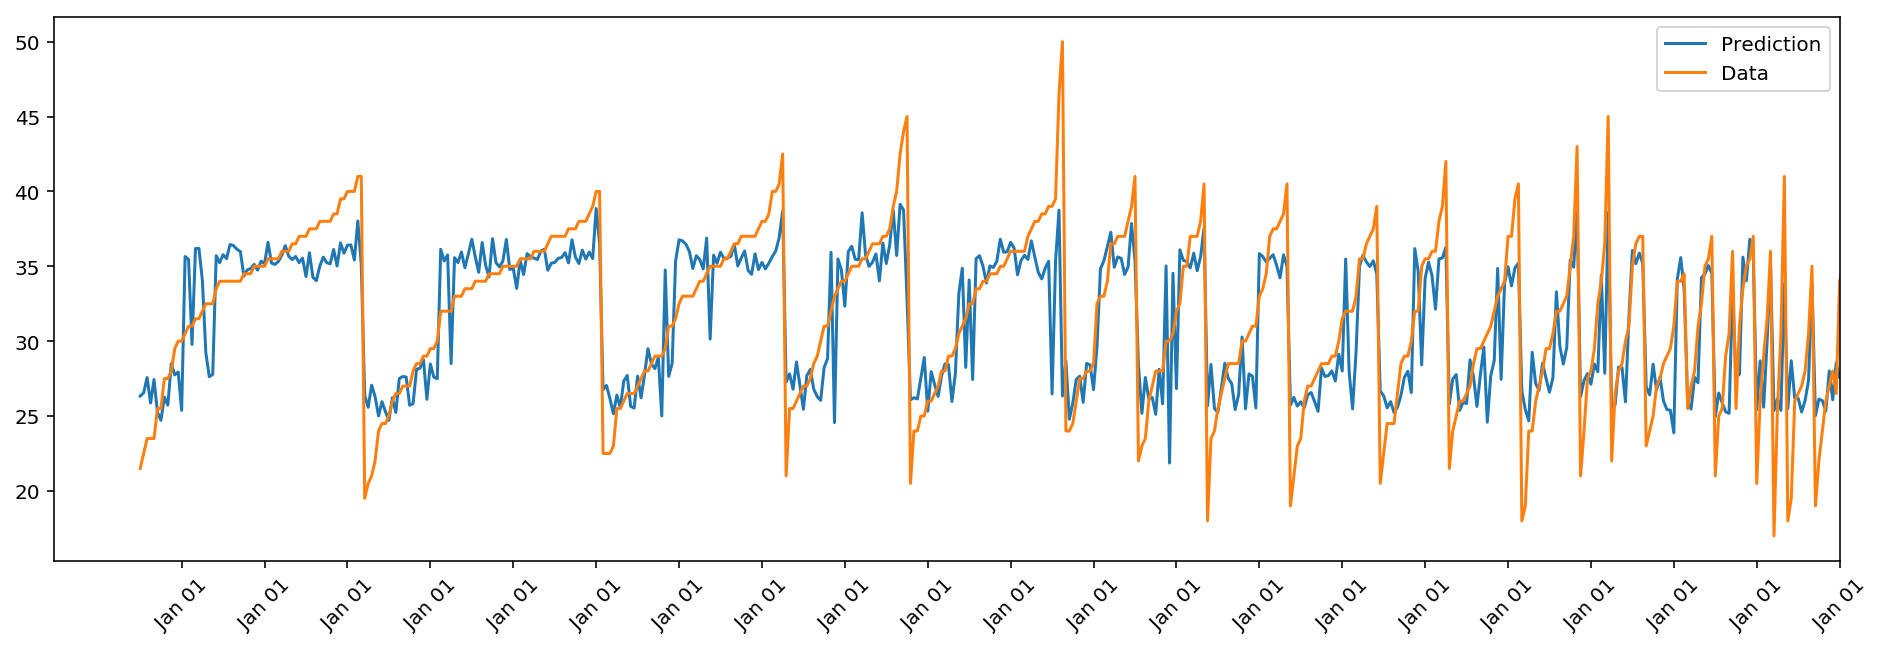

In [47]:
fig, ax = plt.subplots(figsize=(16,5))

mean, std = scaled_features['EL']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['EL']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()
dates = pd.to_datetime(lxxn.iloc[test_data.index]['Seq'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)